In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy as sp
import scipy.stats
path = 'C:\\Users\\user\\OneDrive\\바탕 화면\\수요예측\\train.csv'

# 1.데이터 불러오기

In [2]:
df = pd.read_csv('train.csv')
df.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2013-01-01,0,0,0,0,a,1
1,2,2,2013-01-01,0,0,0,0,a,1
2,3,2,2013-01-01,0,0,0,0,a,1
3,4,2,2013-01-01,0,0,0,0,a,1
4,5,2,2013-01-01,0,0,0,0,a,1


In [3]:
df.shape

(1017209, 9)

In [4]:
store = pd.read_csv('store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
store.shape

(1115, 10)

# 2.데이터 합치기

In [6]:
data = df.merge(store, on = ['Store'], how = 'inner')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,2013-01-01,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,3,2013-01-02,5530,668,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,4,2013-01-03,4327,578,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,5,2013-01-04,4486,619,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,6,2013-01-05,4997,635,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [7]:
data.shape

(1017209, 18)

# 3. datetime으로 변경

In [8]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)

# 4.학습 데이터 만들기

In [9]:
data = data.drop_duplicates(['Date'])

In [10]:
train_data=data.drop(columns = ['Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance',
                            'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear',
                            'PromoInterval','DayOfWeek','Store'])
train_data

,Date,Sales,Customers,Open
0,2013-01-01,0,0,0
1,2013-01-02,5530,668,1
2,2013-01-03,4327,578,1
3,2013-01-04,4486,619,1
4,2013-01-05,4997,635,1
...,...,...,...,...
937,2015-07-27,6102,612,1
938,2015-07-28,5011,560,1
939,2015-07-29,4782,523,1
940,2015-07-30,5020,546,1


In [11]:
Sales = train_data['Sales'].values
Customers = train_data['Customers'].values
Open = train_data['Open'].values
Sales = Sales.reshape(-1,1)

In [12]:
train_data.columns

Index(['Date', 'Sales', 'Customers', 'Open'], dtype='object')

# 5.데이터 정규화 

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
#정규화#
scaler = MinMaxScaler()
scaler.fit(Sales)
Sales = scaler.transform(Sales)

# 6.예측데이터 나누기 

In [30]:
seq_len = 30 
sequence_length = seq_len + 1 

result = []
for index in range(len(Sales) - sequence_length):
    result.append(Sales[index:index
                        + sequence_length])
result = np.array(result)

(911, 31, 1)

# 7.train과 test로 데이터 나누기

In [31]:
row = int(round(result.shape[0] * 0.7)) 
train = result[:row, :] 

In [32]:
x_train = train[:, :-1] 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]


x_train.shape, x_test.shape

((638, 30, 1), (273, 30, 1))

# 8.모델 설계 

In [34]:
import tensorflow as tf
from tensorflow.keras import layers

In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(30,input_shape=(30,1),return_sequences=True))
model.add(tf.keras.layers.LSTM(30,return_sequences=False))
model.add(tf.keras.layers.Dense(1))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 30)            3840      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,191
Trainable params: 11,191
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='mse', 
              optimizer=tf.keras.optimizers.Adam(0.001), 
              metrics=['mae'])

In [38]:
results = model.fit(x_train, y_train,
                    batch_size=5,
                    epochs=10)

Epoch 1/10
128/128 [==============================] - 8s 27ms/step - loss: 0.0493 - mae: 0.1672
Epoch 2/10
128/128 [==============================] - 4s 33ms/step - loss: 0.0450 - mae: 0.1588
Epoch 3/10
128/128 [==============================] - 4s 29ms/step - loss: 0.0445 - mae: 0.1581
Epoch 4/10
128/128 [==============================] - 4s 31ms/step - loss: 0.0449 - mae: 0.1613
Epoch 5/10
128/128 [==============================] - 4s 33ms/step - loss: 0.0437 - mae: 0.1580
Epoch 6/10
128/128 [==============================] - 5s 37ms/step - loss: 0.0443 - mae: 0.1572
Epoch 7/10
128/128 [==============================] - 5s 36ms/step - loss: 0.0439 - mae: 0.1579
Epoch 8/10
128/128 [==============================] - 4s 34ms/step - loss: 0.0436 - mae: 0.1568
Epoch 9/10
128/128 [==============================] - 4s 35ms/step - loss: 0.0429 - mae: 0.1565
Epoch 10/10
128/128 [==============================] - 5s 42ms/step - loss: 0.0432 - mae: 0.1544


# 9.loss 그래프 및 예측그래프 

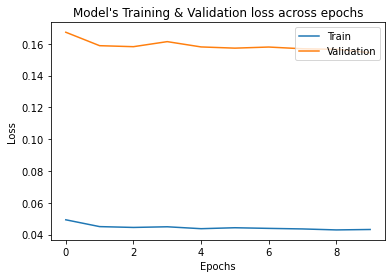

In [39]:
plt.plot(results.history['loss'])
plt.plot(results.history['mae'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

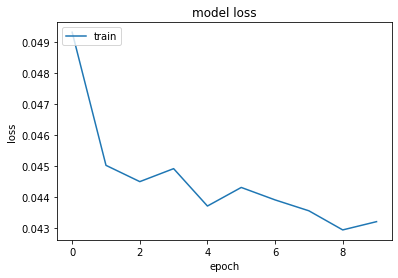

In [40]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

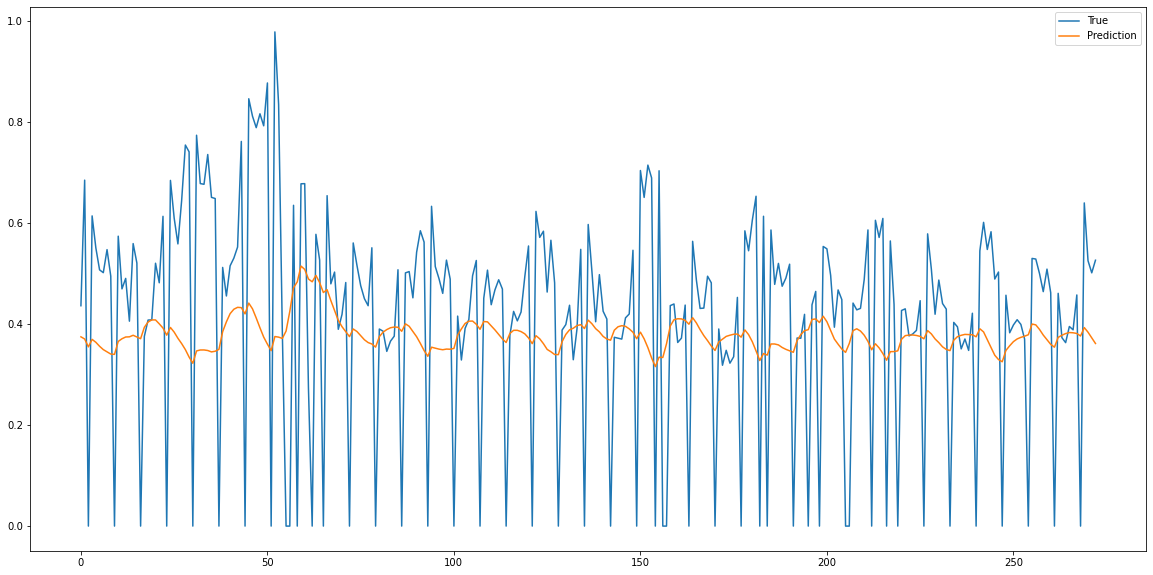

In [41]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()